In [1019]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1020]:
import warnings
warnings.filterwarnings('ignore')

In [1021]:
insurance1=pd.read_csv(r'G:\analytical vidhaya\jan\train.csv',header=0)
insurance1

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [1022]:
insurance1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [1023]:
insurance1.type_of_policy.value_counts()

Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64

In [1024]:
insurance1.policy.value_counts()

A    56644
B    24635
C     8113
Name: policy, dtype: int64

Univariant and bivariant  analysis with Visualization

In [1025]:
insurance1.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


counting values of categorical variable

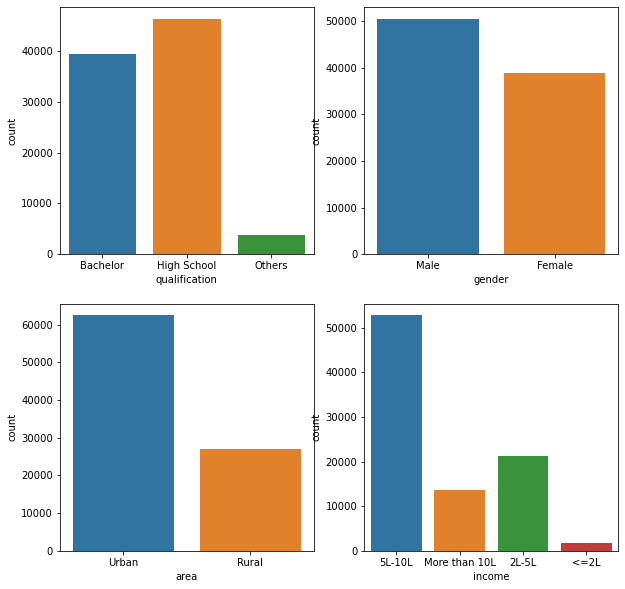

In [1026]:
fig,ax=plt.subplots(2,2,figsize=(10,10));
sns.countplot(insurance1.qualification,ax=ax[0,0]);
sns.countplot(insurance1.gender,ax=ax[0,1]);
sns.countplot(insurance1.area,ax=ax[1,0]);
sns.countplot(insurance1.income,ax=ax[1,1]);


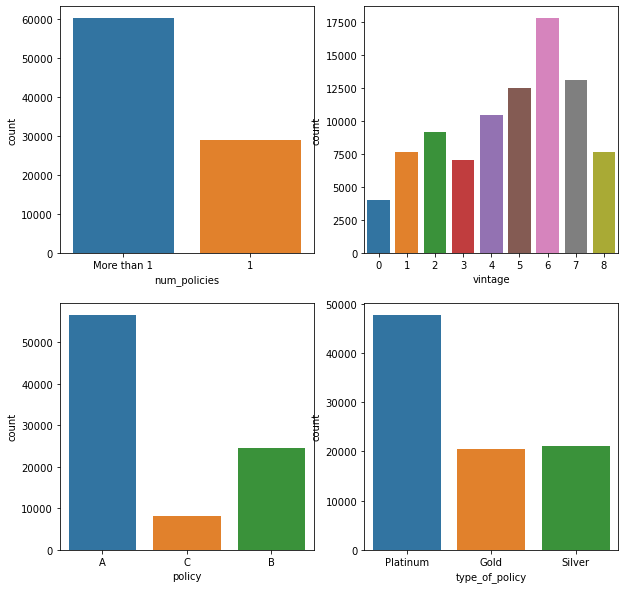

In [1027]:
fig,ax=plt.subplots(2,2,figsize=(10,10));
sns.countplot(insurance1.num_policies,ax=ax[0,0]);
sns.countplot(insurance1.vintage,ax=ax[0,1]);
sns.countplot(insurance1.policy,ax=ax[1,0]);
sns.countplot(insurance1.type_of_policy,ax=ax[1,1]);

Looking for null values in dataframe

In [1028]:
insurance1.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

There is zero null values.

In [1029]:
insurance1.policy.value_counts()

A    56644
B    24635
C     8113
Name: policy, dtype: int64

counting values of numerical variables

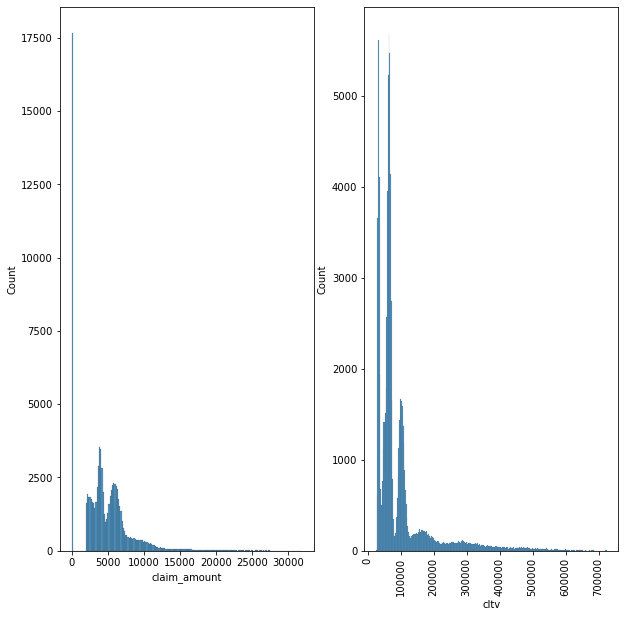

In [1030]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
sns.histplot(insurance1['claim_amount'],ax=ax[0]);
sns.histplot(insurance1['cltv'],ax=ax[1]);
plt.xticks(rotation='vertical');

looking for outliers in claim_amount and cltv.

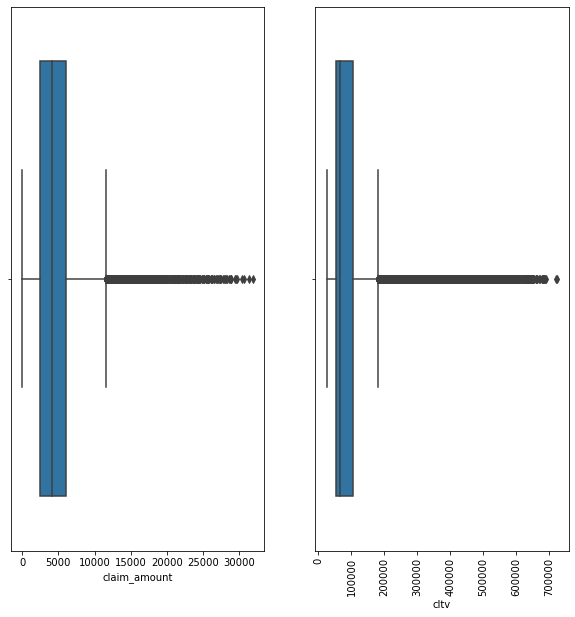

In [1031]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
sns.boxplot(insurance1['claim_amount'],ax=ax[0]);
sns.boxplot(insurance1['cltv'],ax=ax[1]);
plt.xticks(rotation='vertical');

Preprocessing : Converting catogorical variable into numerical variable.
policy and type_of_policy

In [1032]:
from sklearn.preprocessing import LabelEncoder

In [1033]:
le=LabelEncoder()
insurance1['policy_n']=le.fit_transform(insurance1.policy)
insurance1['type_of_policy_n']=le.fit_transform(insurance1.type_of_policy)

In [1034]:
insurance1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                89392 non-null  int64 
 1   gender            89392 non-null  object
 2   area              89392 non-null  object
 3   qualification     89392 non-null  object
 4   income            89392 non-null  object
 5   marital_status    89392 non-null  int64 
 6   vintage           89392 non-null  int64 
 7   claim_amount      89392 non-null  int64 
 8   num_policies      89392 non-null  object
 9   policy            89392 non-null  object
 10  type_of_policy    89392 non-null  object
 11  cltv              89392 non-null  int64 
 12  policy_n          89392 non-null  int32 
 13  type_of_policy_n  89392 non-null  int32 
dtypes: int32(2), int64(5), object(7)
memory usage: 8.9+ MB


In [1035]:
insurance_new1=insurance1.drop(columns=['policy','type_of_policy'],axis=1)
insurance_new1.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,cltv,policy_n,type_of_policy_n
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,64308,0,1
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,515400,0,1
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,64212,0,1
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,97920,0,1
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,59736,0,0


In policy_n : 0 represents A, 1 represents B and 2 represents C

In type_of_policy_n : 1 represents Platinum, 2 represents Silver and 0 represents Gold


In [1036]:
insurance_new1.num_policies=insurance_new1.num_policies.str.replace('More than 1','2')
insurance_new1.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,cltv,policy_n,type_of_policy_n
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,2,64308,0,1
1,2,Male,Rural,High School,5L-10L,0,8,5080,2,515400,0,1
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,2,64212,0,1
3,4,Female,Rural,High School,5L-10L,0,7,0,2,97920,0,1
4,5,Male,Urban,High School,More than 10L,1,6,3508,2,59736,0,0


In [1037]:
insurance_new1.vintage.value_counts()

6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64

In [1038]:
insurance_new1.income.value_counts()

5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64

In [1039]:
insurance_new1.income=insurance_new1.income.str.replace('More than 10L','super high')
insurance_new1.income=insurance_new1.income.str.replace('5L-10L','high')
insurance_new1.income=insurance_new1.income.str.replace('2L-5L','average')
insurance_new1.income=insurance_new1.income.str.replace('<=2L','Low')

Preprocessing : Converting catogorical variables into numerical variables.
income and num_policies

In [1040]:
insurance_new1['income_n']=le.fit_transform(insurance_new1.income)
insurance_new1['num_policies_n']=le.fit_transform(insurance_new1.num_policies)
insurance_new1.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,cltv,policy_n,type_of_policy_n,income_n,num_policies_n
0,1,Male,Urban,Bachelor,high,1,5,5790,2,64308,0,1,2,1
1,2,Male,Rural,High School,high,0,8,5080,2,515400,0,1,2,1
2,3,Male,Urban,Bachelor,high,1,8,2599,2,64212,0,1,2,1
3,4,Female,Rural,High School,high,0,7,0,2,97920,0,1,2,1
4,5,Male,Urban,High School,super high,1,6,3508,2,59736,0,0,3,1


In [1041]:
insurance_new1.num_policies.value_counts()

2    60263
1    29129
Name: num_policies, dtype: int64

In [1042]:
insurance_new1.num_policies_n.value_counts()

1    60263
0    29129
Name: num_policies_n, dtype: int64

In income_n : 2 represents high, 1 represents average , 3 represents super high, and 0 represents low.

In num_policies : 1 represents 'more than 1 policy', and 0 represents 1 policy


In [1043]:
insurance_new2=insurance_new1.drop(columns=['income','num_policies'])
insurance_new2.head()

,id,gender,area,qualification,marital_status,vintage,claim_amount,cltv,policy_n,type_of_policy_n,income_n,num_policies_n
0,1,Male,Urban,Bachelor,1,5,5790,64308,0,1,2,1
1,2,Male,Rural,High School,0,8,5080,515400,0,1,2,1
2,3,Male,Urban,Bachelor,1,8,2599,64212,0,1,2,1
3,4,Female,Rural,High School,0,7,0,97920,0,1,2,1
4,5,Male,Urban,High School,1,6,3508,59736,0,0,3,1


In [1044]:
insurance_new2.qualification.value_counts()

High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64

In [1045]:
insurance_new2.area.value_counts()

Urban    62455
Rural    26937
Name: area, dtype: int64

Preprocessing : coverting categorical variable to numerical. 
Qualification,area and gender.

In [1046]:
insurance_new2['area_n']=le.fit_transform(insurance_new2.area)
insurance_new2['gender_n']=le.fit_transform(insurance_new2.gender)
insurance_new2['qualifiaction_n']=le.fit_transform(insurance_new2.qualification)

In [1047]:
insurance_new2.area_n.value_counts()

1    62455
0    26937
Name: area_n, dtype: int64

In [1048]:
insurance_new2.gender.value_counts()

Male      50497
Female    38895
Name: gender, dtype: int64

In [1049]:
insurance_new2.gender_n.value_counts()

1    50497
0    38895
Name: gender_n, dtype: int64

In gender 1 represent 1 and o represent female.
In area 1 represent urban and 0 represent rural.
In qualification 1 represent High school, 0 represent bachelors, and 2 represent others.

In [1050]:
insurance_new2.head()

,id,gender,area,qualification,marital_status,vintage,claim_amount,cltv,policy_n,type_of_policy_n,income_n,num_policies_n,area_n,gender_n,qualifiaction_n
0,1,Male,Urban,Bachelor,1,5,5790,64308,0,1,2,1,1,1,0
1,2,Male,Rural,High School,0,8,5080,515400,0,1,2,1,0,1,1
2,3,Male,Urban,Bachelor,1,8,2599,64212,0,1,2,1,1,1,0
3,4,Female,Rural,High School,0,7,0,97920,0,1,2,1,0,0,1
4,5,Male,Urban,High School,1,6,3508,59736,0,0,3,1,1,1,1


In [1051]:
insurance_train=insurance_new2.drop(columns=['gender','area','qualification'])
insurance_train

,id,marital_status,vintage,claim_amount,cltv,policy_n,type_of_policy_n,income_n,num_policies_n,area_n,gender_n,qualifiaction_n
0,1,1,5,5790,64308,0,1,2,1,1,1,0
1,2,0,8,5080,515400,0,1,2,1,0,1,1
2,3,1,8,2599,64212,0,1,2,1,1,1,0
3,4,0,7,0,97920,0,1,2,1,0,0,1
4,5,1,6,3508,59736,0,0,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,0,6,0,95736,1,1,3,1,0,1,1
89388,89389,1,0,3897,67596,0,1,2,1,1,1,0
89389,89390,0,4,3363,114120,1,1,2,1,1,0,0
89390,89391,0,8,0,71772,1,1,1,1,0,0,1


Removing outliers from columns : Claim_amount , Cltv

In [1052]:
q1,q3=insurance_train['claim_amount'].quantile([.25,.75])
IQR= q3-q1
ul= q3+(1.5*IQR)
ll=q1-(1.5*IQR)
insurance_train['claim_amount']=np.where(insurance_train['claim_amount']<ll,ll,insurance_train['claim_amount'])
insurance_train['claim_amount']=np.where(insurance_train['claim_amount']>ul,ul,insurance_train['claim_amount'])

In [1053]:
q1,q3=insurance_train['cltv'].quantile([.25,.75])
IQR= q3-q1
ul= q3+(1.5*IQR)
ll=q1-(1.5*IQR)
insurance_train['cltv']=np.where(insurance_train['cltv']<ll,ll,insurance_train['cltv'])
insurance_train['cltv']=np.where(insurance_train['cltv']>ul,ul,insurance_train['cltv'])

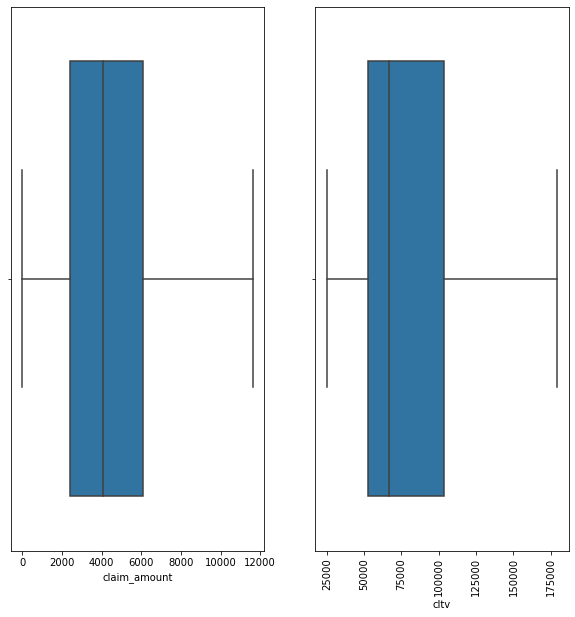

In [1054]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
sns.boxplot(insurance_train['claim_amount'],ax=ax[0]);
sns.boxplot(insurance_train['cltv'],ax=ax[1]);
plt.xticks(rotation='vertical');

Calculating correlation between variables

In [1055]:
insurance_train_corr=insurance_train.corr()
insurance_train_corr

,id,marital_status,vintage,claim_amount,cltv,policy_n,type_of_policy_n,income_n,num_policies_n,area_n,gender_n,qualifiaction_n
id,1.000000,0.000171,-0.005824,0.003257,-0.002253,0.000395,0.002883,0.007826,-0.004105,0.000073,-0.000215,-0.001803
marital_status,0.000171,1.000000,-0.011686,-0.115352,-0.094490,-0.014709,-0.006371,0.031632,-0.082363,-0.048739,0.070468,-0.012618
vintage,-0.005824,-0.011686,1.000000,0.008562,0.030784,0.043822,0.009025,-0.017830,0.050699,0.001145,0.005827,-0.027283
claim_amount,0.003257,-0.115352,0.008562,1.000000,0.214385,-0.116004,-0.023192,-0.208260,0.160019,0.479115,0.048652,0.029855
cltv,-0.002253,-0.094490,0.030784,0.214385,1.000000,-0.011537,-0.033121,-0.090552,0.505717,0.150391,-0.018395,-0.028135
policy_n,0.000395,-0.014709,0.043822,-0.116004,-0.011537,1.000000,0.066279,-0.034305,-0.009837,-0.107123,0.009049,-0.012722
type_of_policy_n,0.002883,-0.006371,0.009025,-0.023192,-0.033121,0.066279,1.000000,-0.045250,-0.033620,-0.027672,-0.010702,-0.031595
income_n,0.007826,0.031632,-0.017830,-0.208260,-0.090552,-0.034305,-0.045250,1.000000,-0.072862,-0.252890,0.018393,-0.000780
num_policies_n,-0.004105,-0.082363,0.050699,0.160019,0.505717,-0.009837,-0.033620,-0.072862,1.000000,0.121898,-0.052871,-0.045894
area_n,0.000073,-0.048739,0.001145,0.479115,0.150391,-0.107123,-0.027672,-0.252890,0.121898,1.000000,0.042516,0.022908


As there is only 4 variables( vintage, claim_amount,num_policies_n and area_n) is positive correlated.

<AxesSubplot:>

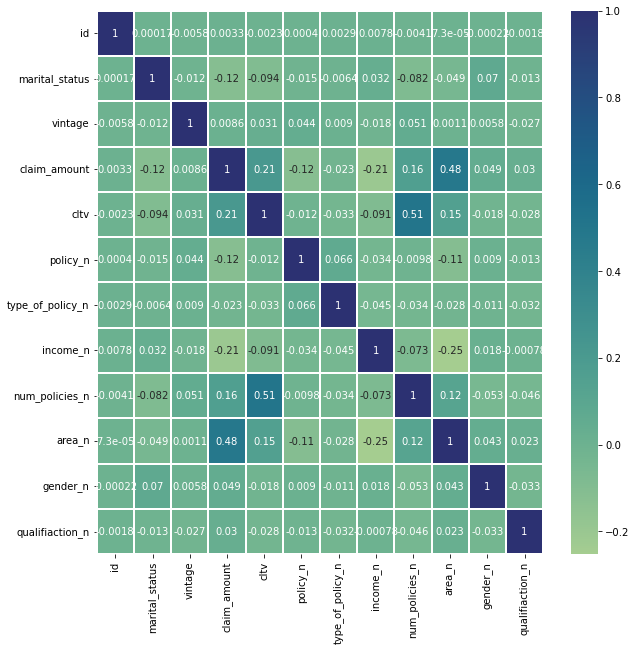

In [1056]:
plt.figure(figsize=(10,10))
sns.heatmap(insurance_train_corr,annot=True,linewidths=2,cmap='crest')

x=train[['area_n','vintage', 'claim_amount','num_policies_n']]

In [1057]:
train=insurance_train.drop('id',axis=1)
x=train.drop('cltv',axis=1)
y=train['cltv']


In [1058]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marital_status    89392 non-null  int64  
 1   vintage           89392 non-null  int64  
 2   claim_amount      89392 non-null  float64
 3   cltv              89392 non-null  float64
 4   policy_n          89392 non-null  int32  
 5   type_of_policy_n  89392 non-null  int32  
 6   income_n          89392 non-null  int32  
 7   num_policies_n    89392 non-null  int32  
 8   area_n            89392 non-null  int32  
 9   gender_n          89392 non-null  int32  
 10  qualifiaction_n   89392 non-null  int32  
dtypes: float64(2), int32(7), int64(2)
memory usage: 5.1 MB


In [1059]:
print(x.shape,y.shape)


(89392, 10) (89392,)


In [1060]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt


I did hypertuning(Xgboost.cv) manually because my laptop is 3rd generation. It was keep on hanging. I have taken max_depth=[10,20,30,35], alpha=[6,8,10],learning_rate[0.3,0.5,0.6].Max_depth=[10,20] is underfitted, max_depth=[35 and above] not have much change in rmse and r2_score. Max_depth 30 is neither overfitted nor underfitted. 

In [1061]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.4, learning_rate = 0.6, max_depth = 30, alpha = 6, 
                           n_estimators = 100)
model = xgb_reg.fit(x,y)
predict_y =model.predict(x)
rmse=sqrt(mean_squared_error(predict_y,y))
r2_score=r2_score(predict_y,y)

print('Rmse :',rmse)
print('r2_score:',r2_score)

[17:28:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Rmse : 15766.356599868996
r2_score: 0.8599192971264986


I got r2_score:0.87 and Rmse:15405.
that is pretty good


Preparing and Processing test dataset for modeling

In [1062]:
insurance1_test=pd.read_csv(r'G:\analytical vidhaya\jan\test.csv',header=0)
insurance1_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [1063]:
le=LabelEncoder()
insurance1_test['policy_n']=le.fit_transform(insurance1_test.policy)
insurance1_test['type_of_policy_n']=le.fit_transform(insurance1_test.type_of_policy)

In [1064]:
insurance_new1_test=insurance1_test.drop(columns=['policy','type_of_policy'],axis=1)


In [1065]:
insurance_new1_test.num_policies=insurance_new1_test.num_policies.str.replace('More than 1','2')


In [1066]:
insurance_new1_test.income=insurance_new1_test.income.str.replace('More than 10L','super high')
insurance_new1_test.income=insurance_new1_test.income.str.replace('5L-10L','high')
insurance_new1_test.income=insurance_new1_test.income.str.replace('2L-5L','average')
insurance_new1_test.income=insurance_new1_test.income.str.replace('<=2L','Low')

In [1067]:
insurance_new1_test['income_n']=le.fit_transform(insurance_new1_test.income)
insurance_new1_test['num_policies_n']=le.fit_transform(insurance_new1_test.num_policies)

In [1068]:
insurance_new2_test=insurance_new1_test.drop(columns=['income','num_policies'])

In [1069]:
insurance_new2_test['area_n']=le.fit_transform(insurance_new2_test.area)
insurance_new2_test['gender_n']=le.fit_transform(insurance_new2_test.gender)
insurance_new2_test['qualifiaction_n']=le.fit_transform(insurance_new2_test.qualification)

In [1070]:
insurance_test=insurance_new2_test.drop(columns=['gender','area','qualification'])
insurance_test.head()


,id,marital_status,vintage,claim_amount,policy_n,type_of_policy_n,income_n,num_policies_n,area_n,gender_n,qualifiaction_n
0,89393,0,6,2134,1,2,2,1,0,0,1
1,89394,0,4,4102,0,1,1,1,1,0,1
2,89395,1,7,2925,1,0,2,1,0,1,1
3,89396,1,2,0,1,2,3,1,0,0,0
4,89397,0,5,14059,1,2,1,1,1,0,1


Removing outliers from claim_amount 

In [1071]:
q1,q3=insurance_test['claim_amount'].quantile([.25,.75])
IQR= q3-q1
ul= q3+(1.5*IQR)
ll=q1-(1.5*IQR)
insurance_test['claim_amount']=np.where(insurance_test['claim_amount']<ll,ll,insurance_test['claim_amount'])
insurance_test['claim_amount']=np.where(insurance_test['claim_amount']>ul,ul,insurance_test['claim_amount'])

<AxesSubplot:xlabel='claim_amount'>

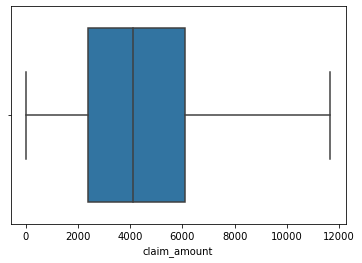

In [1072]:
sns.boxplot(insurance_test['claim_amount'])

convert float datatype to int datatype: claim_amount and cltv

In [1073]:
insurance_test['cltv']=insurance_train['cltv'].mean()
insurance_test['cltv']=insurance_test['cltv'].round()


insurance_test['cltv']=insurance_test['cltv'].astype(int)
insurance_test['claim_amount']=insurance_test['claim_amount'].astype(int)

In [1074]:
test=insurance_test.drop('id',axis=1)
test.head()

,marital_status,vintage,claim_amount,policy_n,type_of_policy_n,income_n,num_policies_n,area_n,gender_n,qualifiaction_n,cltv
0,0,6,2134.0,1,2,2,1,0,0,1,82580.0
1,0,4,4102.0,0,1,1,1,1,0,1,82580.0
2,1,7,2925.0,1,0,2,1,0,1,1,82580.0
3,1,2,0.0,1,2,3,1,0,0,0,82580.0
4,0,5,11663.0,1,2,1,1,1,0,1,82580.0


In [1075]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marital_status    59595 non-null  int64  
 1   vintage           59595 non-null  int64  
 2   claim_amount      59595 non-null  float64
 3   policy_n          59595 non-null  int32  
 4   type_of_policy_n  59595 non-null  int32  
 5   income_n          59595 non-null  int32  
 6   num_policies_n    59595 non-null  int32  
 7   area_n            59595 non-null  int32  
 8   gender_n          59595 non-null  int32  
 9   qualifiaction_n   59595 non-null  int32  
 10  cltv              59595 non-null  float64
dtypes: float64(2), int32(7), int64(2)
memory usage: 3.4 MB


In [1076]:

x_test=test.drop('cltv',axis=1)


Predicting customer lifetime value by xgboost regressor

xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.4, learning_rate = 0.6, max_depth = 30, alpha = 6, 
                           n_estimators = 100)
model = xgb_reg.fit(x,y)
predict_y =model.predict(x)
rmse=sqrt(mean_squared_error(predict_y,y))
r2_score=r2_score(predict_y,y)

print('Rmse :',rmse)
print('r2_score:',r2_score)

In [1077]:

cltv_predict=xgb_reg.predict(x_test)

insurance_test['cltv_predict']=cltv_predict


sample_submission = test[['id','cltv']]
sample_submission.to_csv("sample_submission.csv",index=False)

In [1078]:
sample_submission = insurance_test[['id','cltv_predict']]
sample_submission.head()


,id,cltv,cltv_predict
0,89393,82580.0,86292.132812
1,89394,82580.0,86432.796875
2,89395,82580.0,84080.406250
3,89396,82580.0,83455.921875
4,89397,82580.0,90193.539062


solution=sample_submission.to_csv(r"G:\analytical vidhaya\jan\sample_submission.csv",index=False)

Thank you for giving me this opportunity. i have give my 100%. i would have done much better(visualization and accuracy) if i had better laptop. 